# Simplicity and Depression - K means 

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

Data File: Ginzberg.txt
Source:
Personal communication from Georges Monette, Department of Mathematics and Statistics, York University, with the permission of the original investigator.

<b> Variables: </b>

simplicity: Measures subject's need to see the world in black and white.

fatalism: Fatalism scale. (the belief that all events are predetermined and therefore inevitable)

depression: Beck self-report depression scale

adjsimplicity: Adjusted Simplicity: Simplicity adjusted (by regression) for other variables thought to influence depression.

adjfatalism: Adjusted Fatalism.

adjdepression: Adjusted Depression.

<b>Note</b>: These scales are predefined in psycology and is calcuated for every individual using a set of questions which they have to answer

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
from matplotlib import pyplot as plt
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [3]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [4]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [5]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


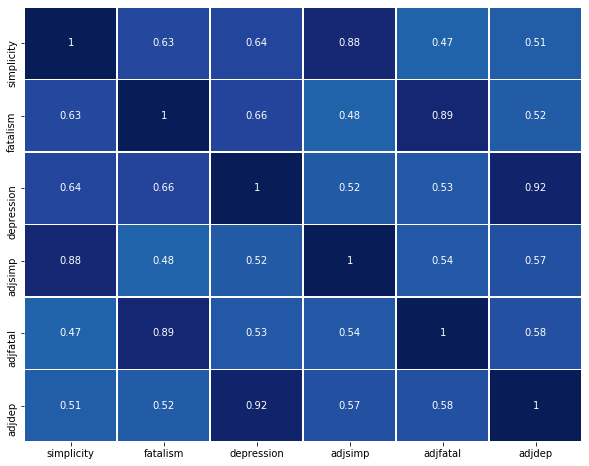

In [7]:
#-------------------------------Heat map to identify highly correlated variables-------------------------
plt.figure(figsize=(10,8))
sns.heatmap(mydata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


In [8]:
mydata.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.0,0.5,0.25,0.66,0.88,1.27,2.85
fatalism,82.0,1.0,0.5,-0.06,0.56,0.98,1.39,2.22
depression,82.0,1.0,0.5,0.47,0.57,0.82,1.37,2.25
adjsimp,82.0,1.0,0.5,0.24,0.70,0.97,1.20,2.95
adjfatal,82.0,1.0,0.5,0.03,0.73,0.92,1.30,2.25
adjdep,82.0,1.0,0.5,0.23,0.60,0.97,1.26,2.79


In [9]:
mydata.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)

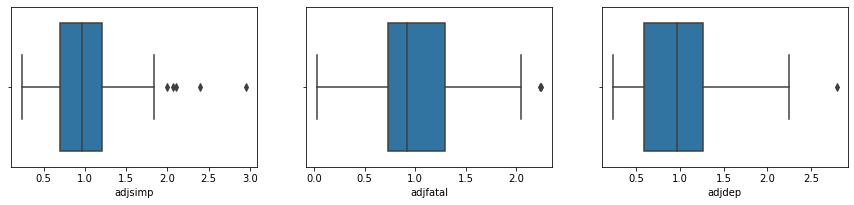

In [10]:
#--Checking Outliers
plt.figure(figsize=(15,10))
pos = 1
for i in mydata.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(mydata[i])
    pos += 1 

In [11]:
col_names=list(mydata.columns)
display(col_names)

for i in col_names:
    q1, q2, q3 = mydata[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    mydata[i]=mydata[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['adjsimp', 'adjfatal', 'adjdep']

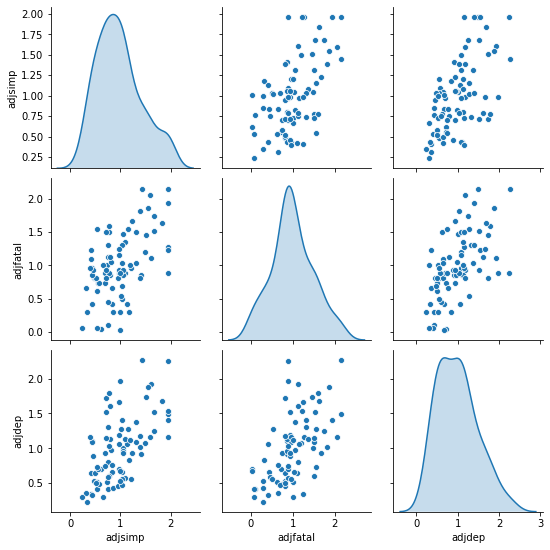

In [12]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [13]:
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)

mydata_z.head()


,adjsimp,adjfatal,adjdep
0,-0.501853,-1.813141,-1.205908
1,-0.575313,0.002917,-0.999865
2,-0.816015,-1.952782,-0.601098
3,-0.328581,-1.171207,-0.707234
4,-1.146642,-0.373392,-0.961480


<b> Cluster Inputs </b>

1. n_clusters - int, default=8
The number of clusters to form as well as the number of centroids to generate.


2. n_init- int, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


3. max_iter- int, default=300
Maximum number of iterations of the k-means algorithm for a single run.


4. random_state - int, RandomState instance, default=None
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 



1. cluster_centers_  - ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.


2. labels_   - ndarray of shape (n_samples,)
Labels of each point


3. inertia_  - float
Sum of squared distances of samples to their closest cluster center.


4. n_iter_  - int
Number of iterations run.

In [14]:
# List to store cluster and intra cluster distance

clusters = []
inertia_vals = []

# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7, n_jobs=10)
    model.fit(mydata_z)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

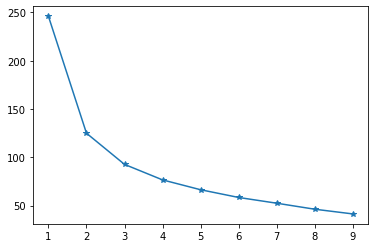

In [15]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

for i in range(2,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(n_clusters=3, n_jobs=10, random_state=7)
Silhouette score: 0.3191854112351335
---------------------------------------
KMeans(n_clusters=4, n_jobs=10, random_state=7)
Silhouette score: 0.2754646668550391
---------------------------------------
KMeans(n_clusters=5, n_jobs=10, random_state=7)
Silhouette score: 0.2816887349871598
---------------------------------------
KMeans(n_clusters=6, n_jobs=10, random_state=7)
Silhouette score: 0.274954119691221
---------------------------------------
KMeans(n_clusters=7, n_jobs=10, random_state=7)
Silhouette score: 0.25210720372644757
---------------------------------------
KMeans(n_jobs=10, random_state=7)
Silhouette score: 0.26048840607982754
---------------------------------------
KMeans(n_clusters=9, n_jobs=10, random_state=7)
Silhouette score: 0.27461399903019457


In [17]:
#Set the value of k=7
kmeans = KMeans(n_clusters=7, n_init = 15, random_state=2345)

In [18]:
kmeans.fit(mydata_z)

KMeans(n_clusters=7, n_init=15, random_state=2345)

In [19]:
centroids = kmeans.cluster_centers_

In [20]:
centroids

array([[-1.01528338, -0.07349594, -0.68784398],
       [ 1.69313069,  0.93756169,  1.62845742],
       [ 0.58832688,  0.48888302,  0.23524368],
       [-0.70786915, -1.56913797, -1.07812689],
       [ 0.0050922 , -0.45823171, -0.33342912],
       [ 1.67683298,  1.92229208,  0.56291853],
       [-0.34540573,  0.38643138,  1.20797396]])

In [21]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [22]:
print(centroid_df)

    adjsimp  adjfatal    adjdep
0 -1.015283 -0.073496 -0.687844
1  1.693131  0.937562  1.628457
2  0.588327  0.488883  0.235244
3 -0.707869 -1.569138 -1.078127
4  0.005092 -0.458232 -0.333429
5  1.676833  1.922292  0.562919
6 -0.345406  0.386431  1.207974


In [23]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [25]:
#--Calculating the count of data points percluster
df_labeled['labels'].value_counts()

0    19
4    18
3    11
2    11
6     9
1     9
5     5
Name: labels, dtype: int64

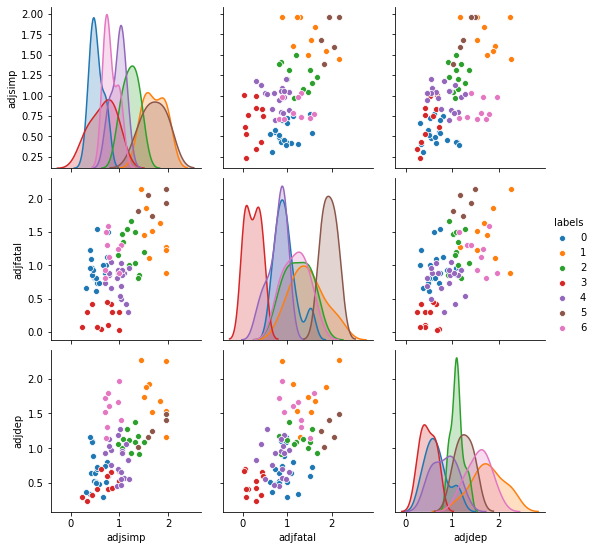

In [26]:
sns.pairplot(df_labeled,hue='labels')

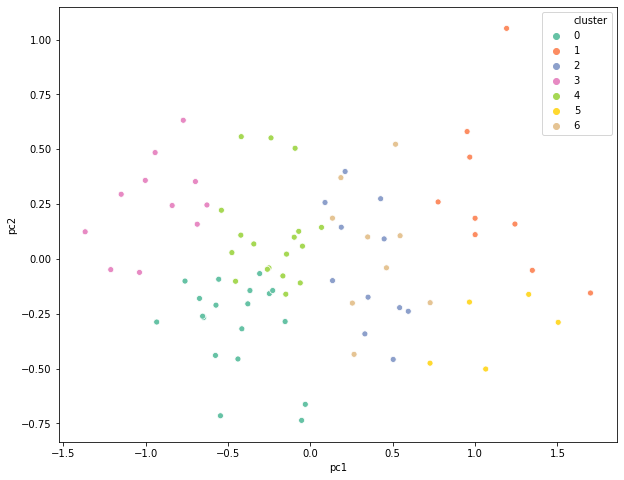

In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(mydata)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])



principalDf['cluster']=kmeans.labels_
principalDf.head()
plt.figure(figsize=(10,8))
sns.scatterplot(x=principalDf.pc1, y=principalDf.pc2, hue=principalDf.cluster, palette="Set2")


In [28]:
df_labeled.head()

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,3
1,0.72717,0.99915,0.51688,0
2,0.62176,0.03811,0.70699,3
3,0.83522,0.42218,0.65639,3
4,0.47697,0.81423,0.53518,0


In [29]:
df_labeled.groupby('labels').mean().round(2).reset_index()

,labels,adjsimp,adjfatal,adjdep
0,0,0.53,0.96,0.67
1,1,1.72,1.46,1.77
2,2,1.24,1.24,1.11
3,3,0.67,0.23,0.48
4,4,0.98,0.77,0.83
5,5,1.71,1.94,1.26
6,6,0.83,1.19,1.57


The above result is important to name clusters when presenting the clusters to different stakeholders. This presents an overall scenario of how different clusters are different from the other.

In [ ]:
# # Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
# from mpl_toolkits.mplot3d import Axes3D

In [ ]:

# ## 3D plots of clusters

# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
# k3_model=KMeans(3)
# k3_model.fit(mydata_z)
# labels = k3_model.labels_
# ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Length')
# ax.set_ylabel('Height')
# ax.set_zlabel('Weight')
# ax.set_title('3D plot of KMeans Clustering')

In [ ]:
# Let us try with K = 3 (to demonstrate the 3d plot)
# final_model=KMeans(3)
# final_model.fit(mydata)
# prediction=final_model.predict(mydata)

# #Append the prediction 
# mydata["GROUP"] = prediction
# print("Groups Assigned : \n")
# mydata[["adjdep", "GROUP"]]

In [ ]:
# mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [ ]:
# #To determine if a relationship exists between black and white thinking(simplicity) and depression. 
# mydata['adjsimp'].corr(mydata['adjdep'])

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be 
considered moderate and positive. This means that we can see a clear relationship between black and white thinking and 
Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that 
higher levels of black and white thinking is associated with higher levels of depression

In [ ]:
# #Finding optimal no. of clusters
# from scipy.spatial.distance import cdist
# clusters=range(1,10)
# meanDistortions=[]

# for k in clusters:
#     model=KMeans(n_clusters=k, random_state=7, n_jobs=10)
#     model.fit(mydata_z)
#     prediction=model.predict(mydata_z)
#     meanDistortions.append(sum(np.min(cdist(mydata_z, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_z.shape[0])


# plt.plot(clusters, meanDistortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Average distortion')
# plt.title('Selecting k with the Elbow Method')